# Machine Learning Engineer Nanodegree
## Capstone Project
Qixiang Zhang  
Jul 3rd, 2018

## [*What's Cooking?*](https://www.kaggle.com/c/whats-cooking) |  [Kaggle](https://www.kaggle.com/)
A featured [Kaggle](https://www.kaggle.com/) playground competition

![Cover](pic/cover.jpg)

## I. Definition

### Background

This project is built upon one of [Kaggle](https://www.kaggle.com/)'s playground competition - [*What's Cooking?*](https://www.kaggle.com/c/whats-cooking).

Grew up in China, studied in the United States for 10 years, traveled to some parts of the world, and inspired by Anthony Bourdain, I love eating and making food. Being a home-cook myself, I always enjoy mixing a few ingredients to produce meals that my family love (most of the time).

Thank [Yummly](https://www.yummly.com/) for the dataset and [Kaggle](https://www.kaggle.com/) for hosting the competition. I will leverage what I have learned from [Udacity](https://www.udacity.com/)'s Machine Learning Nanodegree program to explore machine learning models and produce the optimal results for this capstone project.

Even though this is a passed competition, it is listed as a playground. I have registered with this competition and here is my Kaggle [page](https://www.kaggle.com/dzkaggle).

I have also found these cool papers and sources below regarding multiclass classification:
- [Survey on Multiclass Classification Methods](https://www.cs.utah.edu/~piyush/teaching/aly05multiclass.pdf)
- [A Comparison of Methods for Multi-class Support Vector Machines](https://www.csie.ntu.edu.tw/~cjlin/papers/multisvm.pdf)
- [Towards Maximizing the Area Under the ROC Curve for Multi-Class Classification Problems](https://www.aaai.org/ocs/index.php/AAAI/AAAI11/paper/download/3485/3882)
- [A simplified extension of the Area under the ROC to the multiclass domain](https://pdfs.semanticscholar.org/dc70/1e7fca147e2bf37f14481e35e1b975396809.pdf)
- [L1 AND L2 REGULARIZATION FOR MULTICLASS HINGE LOSS MODELS](https://pdfs.semanticscholar.org/e82c/817c75061797f2ec111610ae4ce8d8c20794.pdf)
- [On Logistic Regression: Gradients of the Log Loss, Multi-Class Classification, and Other Optimization Techniques](http://ttic.uchicago.edu/~suriya/website-intromlss2018/course_material/Day3b.pdf)
- [Machine Learning Basics Lecture 7: Multiclass Classification](https://www.cs.princeton.edu/courses/archive/spring16/cos495/slides/ML_basics_lecture7_multiclass.pdf)

### Problem Statement

The main goal is to categorize the cuisine by using recipe ingredients. Specifically, to answer these questions below:
 - What are the most used ingredients in each of the cuisines?
 - How similar or different are these cuisines?
 - Given a recipe (ingredient list), how accurately can the model classify its cuisine?

From the labeled dataset, we can learn: what are the most used ingredients, main ingredients for each cuisine, which cuisines are similar to each other (consists of similar ingredients), and finally use recipe ingredients to predict the most probable cuisines.

### Metrics

Originally, I was going to use AUC_ROC to measure the performance of my models because the class samples are imbalanced. For example, Italian cuisine has 7838 recipes (19.71%) while Brazillian cuisine has only 467 recipes (1.17%). However, I decided to stick with the Kaggle's metric "accuracy" to measure the performances of my model for two reasons: the results will be measured under Kaggle's evaludation methodology and AUC_ROC may give my model a different result; AUC_ROC is very complicated to implement across all the models I will be using. To compensate the imbalanced data, I will split the train-validation data manually to maintain the weights for each class. I will also use sklearn's StratifiedKFold to cross validate the models while doing the grid search for the best parameters for each model.

The main goal is to be able to use an ingredients list to predict the most probable cuisine (e.g. Greek, Indian, Chinese, etc.) out of 20 total possible cuisines. The training dataset is clean and labeled. I can directly use defined models to train on the dataset and to classify recipes into 20 different classes.

The multiclass classification problem can be decomposed into several binary classification tasks that can be solved efficiently using binary classifiers [Multiclass Classification], I will be using some of the scikit-learn modules as follows:
- [Gaussian Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
- Ensemble Methods ([Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [XGBoost](https://github.com/dmlc/xgboost), and [LightGBM](https://github.com/Microsoft/LightGBM))
- [Stochastic Gradient Descent Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
- [Support Vector Machines](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV)

Last, I will design a deep neural network from [Keras](https://keras.io/) (inspired by [Jason Brownlee's article](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/))

[Multiclass Classification]: https://www.cs.utah.edu/~piyush/teaching/aly05multiclass.pdf

### Project Steps
The workflow for solving the problem would follow the similar approach that provided by other projects in the Machine Learning Nanodegree:  
 1. Import the data
 2. Study the data
 3. Preprocess the data
 4. Explore different models
 5. Evaluate the models
 6. Summary

## II. Analysis

In [1]:
##### EXPLORE #########==================
# data exploring and basic libraries
import random
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import deque as dq

# NLP preprocessing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize as TK
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer

##### MODELING ######===================
# from time import time
# train test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# model eval
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# basic multi-class classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# binary class classification models
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# One vs All wrapper
from sklearn.multiclass import OneVsRestClassifier

# additional multi-class classification models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# deep learning
import tensorflow as tf
import keras

###### supplementary code#######

# Pretty display for notebooks
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

Using TensorFlow backend.


### Data Exploration

In [2]:
# load the data - test data
rawdf_te = pd.read_json(path_or_buf='raw_data/test.json')
rawdf_te.head(n=3)

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."


In [3]:
# load the data - train data
rawdf_tr = pd.read_json(path_or_buf='raw_data/train.json')
rawdf_tr.head(n=3)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."


Weight	 Recipe	 Cuisine

19.71 %	 7838 	 italian
16.19 %	 6438 	 mexican
10.86 %	 4320 	 southern_us
7.55 %	 3003 	 indian
6.72 %	 2673 	 chinese
6.65 %	 2646 	 french
3.89 %	 1546 	 cajun_creole
3.87 %	 1539 	 thai
3.58 %	 1423 	 japanese
2.95 %	 1175 	 greek
2.49 %	 989 	 spanish
2.09 %	 830 	 korean
2.07 %	 825 	 vietnamese
2.06 %	 821 	 moroccan
2.02 %	 804 	 british
1.9 %	 755 	 filipino
1.68 %	 667 	 irish
1.32 %	 526 	 jamaican
1.23 %	 489 	 russian
1.17 %	 467 	 brazilian


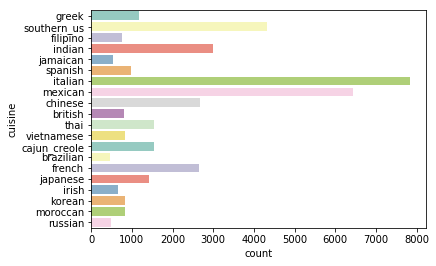

In [4]:
# cuisine distribution
sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, 1, figsize=(25, 12), tight_layout=0)
ax = sns.countplot(y='cuisine', data=rawdf_tr, palette ='Set2')
ax.set_title(label='Recipe Distribution', fontdict={'fontsize':35}, pad=10)

# number of recipes for each cuisines
print('Weight\t Recipe\t Cuisine\n')
for _ in (Counter(rawdf_tr['cuisine']).most_common()):print(round(_[1]/rawdf_tr.cuisine.count()*100, 2),'%\t',_[1],'\t', _[0])

In [5]:
# change id column type to string
rawdf_tr = rawdf_tr.set_index('id')
rawdf_te = rawdf_te.set_index('id')

# training ingredient list
ingredients_list_tr = []
for _ in rawdf_tr['ingredients']:
    ingredients_list_tr.append(_)
# ingredients set - ingredients_set()
ingredients_set_tr = set()
for a in range(len(ingredients_list_tr)):
    for _ in range(len(ingredients_list_tr[a])):
        ingredients_set_tr.add(ingredients_list_tr[a][_])

# Total number of recipes
print('Total of %d recipes\n'% len(rawdf_tr))

# total number of UNIQUE cuisines
print('Total of %d types of cuisines including %s\n' % \
      (len(rawdf_tr['cuisine'].unique()), rawdf_tr['cuisine'].unique().tolist()))
                                          
# unique ingredients (raw training data)
print("Total of %d unique ingredients\n" % len(ingredients_set_tr))

# total ingredients list (with repition) occurred in the train data
total_ingredients_list_tr = []
for i in range(len(ingredients_list_tr)):
    for j in range(len(ingredients_list_tr[i])):
        total_ingredients_list_tr.append(ingredients_list_tr[i][j])
print("Most common ingredients used:\n")
for _ in range(len(Counter(total_ingredients_list_tr).most_common(11))):
    print(Counter(total_ingredients_list_tr).most_common(11)[_])

Total of 39774 recipes

Total of 20 types of cuisines including ['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']

Total of 6714 unique ingredients

Most common ingredients used:

('salt', 18049)
('onions', 7972)
('olive oil', 7972)
('water', 7457)
('garlic', 7380)
('sugar', 6434)
('garlic cloves', 6237)
('butter', 4848)
('ground black pepper', 4785)
('all-purpose flour', 4632)
('pepper', 4438)


#### How similar are these cuisines?

I found this [graph in the competition kernel page](https://www.kaggle.com/alonalevy/cultural-diffusion-by-recipes/notebook) posted by [alona_levy](https://www.kaggle.com/alonalevy) completed this question beautifully. All kudos to him showing the relationships between cuisines. The image is included as below:
![cuisines_bubble](pic/cuisines_bubble.jpg)

### Algorithms and Techniques
Within the ingredient list, although I have consoladated each ingredient from every recipe, some of the differentiated ingredients might still be the same (i.e. garlic vs. garlic cloves). Natural language processing is recommended for training better models. The option will be explored and tested after implementing the benchmark model - random forest.

Additionally, we can see that the classes are imbalanced. Some of the cuisines have more recipes (or training data) than others. Therefore, [Accuracy may not be the appropriate metric](https://towardsdatascience.com/accuracy-paradox-897a69e2dd9b) for measuring the performances of each model, however, Kaggle uses accuracy to score every competitor. I will mannually split the training dataset into training and hold-out testing to best maintain the weights for each class. Then, I will use [StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) to cross validate each model and [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to tune each model. Lastly, I will use accuracy as a scoring function within the grid search method to measure the performance of each model under different set of parameters.

### Benchmark - Random Forest (sklearn.ensemble.[RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

Random forest is an ensemble learning method for classification that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. The nature of random forest is perfect for multi-class classification.

For the benchmark model, I will be implementing the random forest model out of the box without tuning the parameters. Let's see how well the model does in the later section after preprocessing the data!

## III. Methodology

### Preprocess the datasets

I found the ingredient column stores each indgredients in a list. I also found there are some characters that are not useful for classification (i.e. '()', numbers, '¢', etc.). One way to get rid of them is to use regular expression functions to find the pattern and remove the non-letter characters. Another powerful library that I found through the [source1](https://machinelearningmastery.com/clean-text-machine-learning-python/) and [source2](https://www.kaggle.com/futurist/text-preprocessing-and-machine-learning-modeling) is to use natural language process package [ntlk](https://www.nltk.org/api/nltk.stem.html).

Let's look at in detail!

#### What does the ingredients column look like?

In [6]:
print(rawdf_tr['ingredients'].loc[41935])
print(rawdf_tr['ingredients'].loc[27566])
print(rawdf_tr['ingredients'].loc[32596])
print(rawdf_tr['ingredients'].loc[8476])

['(    oz.) tomato sauce', 'serrano chilies', 'golden raisins', 'firmly packed brown sugar', 'chopped garlic', 'vinegar']
['manchego cheese', 'empanada', 'jalapeno chilies', 'garlic salt', '2 1/2 to 3 lb. chicken, cut into serving pieces', "hellmann' or best food real mayonnais", 'vegetable oil', 'sliced green onions']
['butter', 'sugar', 'corn starch', 'Betty Crockerâ„¢ oatmeal cookie mix', 'YoplaitÂ® Greek 100 blackberry pie yogurt', 'blackberries']
['Tipo 00 flour', 'semolina', 'extra-virgin olive oil', 'large free range egg']


These ingredients above are small samples in the training dataset. We have to preprocess the data to clean the 'ingredients' going into the models before training.

I will use [regular expression](https://docs.python.org/2/library/re.html) to get rid of non-letter characters, and then [nltk](https://www.nltk.org/api/nltk.stem.html) to restore words to their original forms (i.e. 'tomatoes -> tomato') 

1. I found this [tutorial](https://www.youtube.com/watch?v=K8L6KVGG-7o) very helpful for learning the basics about the regular expression library.
2. I learned most about **lemmatizing** and **stemming** from [here](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html).

In [7]:
# copy the series from the dataframe
ingredients_tr = rawdf_tr['ingredients']
# do the test.json while at it
ingredients_te = rawdf_te['ingredients']

In [8]:
# substitute the matched pattern
def sub_match(pattern, sub_pattern, ingredients):
    for i in ingredients.index.values:
        for j in range(len(ingredients[i])):
            ingredients[i][j] = re.sub(pattern, sub_pattern, ingredients[i][j].strip())
            ingredients[i][j] = ingredients[i][j].strip()
    re.purge()
    return ingredients

def regex_sub_match(series):
    # remove all units
    p0 = re.compile(r'\s*(oz|ounc|ounce|pound|lb|inch|inches|kg|to)\s*[^a-z]')
    series = sub_match(p0, ' ', series)
    # remove all digits
    p1 = re.compile(r'\d+')
    series = sub_match(p1, ' ', series)
    # remove all the non-letter characters
    p2 = re.compile('[^\w]')
    series = sub_match(p2, ' ', series)
    return series

In [9]:
# regex both train and test data
ingredients_tr = regex_sub_match(ingredients_tr)
ingredients_te = regex_sub_match(ingredients_te)

#### What do those previous examples look like now?

In [10]:
print(ingredients_tr[41935])
print(ingredients_tr[27566])
print(ingredients_tr[32596])
print(ingredients_tr[8476])

['toma sauce', 'serrano chilies', 'golden raisins', 'firmly packed brown sugar', 'chopped garlic', 'vinegar']
['manchego cheese', 'empanada', 'jalapeno chilies', 'garlic salt', 'chicken  cut in serving pieces', 'hellmann  or best food real mayonnais', 'vegetable oil', 'sliced green onions']
['butter', 'sugar', 'corn starch', 'Betty Crockerâ   oatmeal cookie mix', 'YoplaitÂ  Greek   blackberry pie yogurt', 'blackberries']
['Tipo   flour', 'semolina', 'extra virgin olive oil', 'large free range egg']


This is much better! Now let's use the lemmatizer to restore the words to their original form.

In [11]:
# declare instance from WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# remove all the words that are not nouns -- keep the essential ingredients
def lemma(series):
    for i in series.index.values:
        for j in range(len(series[i])):
            # get rid of all extra spaces
            series[i][j] = series[i][j].strip()
            # Tokenize a string to split off punctuation other than periods
            token = TK(series[i][j])
            # set all the plural nouns into singular nouns
            for k in range(len(token)):
                token[k] = lemmatizer.lemmatize(token[k])
            token = ' '.join(token)
            # write them back
            series[i][j] = token
    return series

In [12]:
# lemmatize both train and test data
ingredients_tr = lemma(ingredients_tr)
ingredients_te = lemma(ingredients_te)

Finally, let's look at the preprocessed results!

In [13]:
print(ingredients_tr[41935])
print(ingredients_tr[27566])
print(ingredients_tr[32596])
print(ingredients_tr[8476])

['toma sauce', 'serrano chilies', 'golden raisin', 'firmly packed brown sugar', 'chopped garlic', 'vinegar']
['manchego cheese', 'empanada', 'jalapeno chilies', 'garlic salt', 'chicken cut in serving piece', 'hellmann or best food real mayonnais', 'vegetable oil', 'sliced green onion']
['butter', 'sugar', 'corn starch', 'Betty Crockerâ oatmeal cookie mix', 'YoplaitÂ Greek blackberry pie yogurt', 'blackberry']
['Tipo flour', 'semolina', 'extra virgin olive oil', 'large free range egg']


In [14]:
# copy back to the dataframe
rawdf_tr['ingredients_lemma'] = ingredients_tr
rawdf_tr['ingredients_lemma_string'] = [' '.join(_).strip() for _ in rawdf_tr['ingredients_lemma']]
# do the same for the test.json dataset
rawdf_te['ingredients_lemma'] = ingredients_te
rawdf_te['ingredients_lemma_string'] = [' '.join(_).strip() for _ in rawdf_te['ingredients_lemma']]

Originally, I was going to remove all the words except for nouns. However, I found the nltk library does not usually pos_tag each word correctly (i.e. the word 'chicken' was tagged as a verb instead of a noun). Also, removing these words might throw away some important data for training.

### Implementation

#### Implementation - further preprocessing  
  
I found another very useful technique: [Tf-IDF or term frequency–inverse document frequency](https://nlp.stanford.edu/IR-book/html/htmledition/tf-idf-weighting-1.html). According to [Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), it is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. Tf-idf is one of the most popular term-weighting schemes today; 83% of text-based recommender systems in digital libraries use tf-idf.

Now the input data for both training and testing have been preprocessed by removing units and some of the non-letter characters such as numbers and whitespaces. It still needs to be configured into a tf-idf matrix before feeding into different models. Instead of using strings as input, I will be using the [tfidfvectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from sklearn to configure the strings into numbers as input.

In [15]:
# DataFrame for training and validation
traindf = rawdf_tr[['cuisine', 'ingredients_lemma_string']].reset_index(drop=True)
print(traindf.shape)
traindf.head()

(39774, 2)


,cuisine,ingredients_lemma_string
0,greek,romaine lettuce black olive grape tomato garli...
1,southern_us,plain flour ground pepper salt tomato ground b...
2,filipino,egg pepper salt mayonaise cooking oil green ch...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallot cornflour cayenne pepper ...


In [16]:
testdf = rawdf_te[['ingredients_lemma_string']]
print(testdf.shape)
testdf.head()

(9944, 1)


,ingredients_lemma_string
id,
18009,baking powder egg all purpose flour raisin mil...
28583,sugar egg yolk corn starch cream of tartar ban...
41580,sausage link fennel bulb frond olive oil cuban...
29752,meat cut file powder smoked sausage okra shrim...
35687,ground black pepper salt sausage casing leek p...


In [17]:
# training ===================
# X_train
X_train_ls = traindf['ingredients_lemma_string']
vectorizertr = TfidfVectorizer(stop_words='english', analyzer="word", max_df=0.65, min_df=2, binary=True)
X_train = vectorizertr.fit_transform(X_train_ls)

# y_train
y_train = traindf['cuisine']
# for xgboost the labels need to be labeled with encoder
le = LabelEncoder()
y_train_ec = le.fit_transform(y_train)

# predicting =================
# X_test
X_pred_ls = testdf['ingredients_lemma_string']
vectorizerts = TfidfVectorizer(stop_words='english')
X_pred = vectorizertr.transform(X_pred_ls)

#### Implementation - metric  
  
As I have previously mentioned, I originally planned to use AUC-ROC to measure the performance for the models but I decided to stick with [Kaggle's original guidline](https://www.kaggle.com/c/whats-cooking#evaluation) to measure each model based on the categorization accuracy (the percent of dishes that you correctly classify).  

Additionally, I will be using sklearn's grid search with cross validation to search for the best parameters for the models (except for Keras deep learning model) that I will be using. The cost of running time and tweaking is very high (about a week).

Please refer to the file: **best_estimators.py** or **best_estimators.ipynb** for the GridSearchCV for details.
  
#### Implementation - algorithms (models) I will be using:

This [page](http://scikit-learn.org/stable/modules/multiclass.html) gives a clear guide on sklearn's available algorithms that I may be able to use. Among all the algorithms, I choose to implement the following from sklearn:
 - Random Forest (sklearn.ensemble.[RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))
 - Naive Bayes (sklearn.naive_bayes.[MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html))
 - Logistic Regression (sklearn.linear_model.[LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression))
 - Neural Network by sklearn (sklearn.neural_network.[MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier))
 - Logistic Regression (sklearn.linear_model.[LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)) with the one-vs-all wrapper by sklearn
 - Support Vector Classification (sklearn.svm.[SVC¶](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)) with the one-vs-all wrapper by sklearn
 - SGD (sklearn.linear_model.[SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)) with the one-vs-all wrapper by sklearn

Additionally, I will be implementing:  
 - [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html)
 - [LightGBM](https://lightgbm.readthedocs.io/en/latest/_modules/lightgbm/sklearn.html#LGBMClassifier)
 - [Keras](https://keras.io/layers/core/) Deep Neural Network (not in this notebook: please refer to the file: **chef_keras_deep_cooking.py** or **chef_keras_deep_cooking.ipynb** for details)

### Refinement

In [ ]:
### a function to save the csv files for submittions to Kaggle for results
def submit_csv(y_pred_model, name):
    submit_df = pd.DataFrame()
    submit_df['id'] = testdf.index.values
    submit_df['cuisine'] = y_pred_model
    submit_df.to_csv(name, index=False)

In [ ]:
# Benchmark
clf_rf = RandomForestClassifier()
# fit the training data
clf_rf = clf_rf.fit(X_train, y_train)
# make prediction on the cuisine
y_pred_rf = clf_rf.predict(X_pred)

# save the predicted cuisine into a csv file per Kaggle guideline
submit_csv(y_pred_rf, 'random_forest_benchmark.csv')

I have implemented the base model using sklearn's random forest without adjusting any parameters. I received a result of 0.70002 (around top 80% on the public leaderboard on Kaggle when the competition was active) - I think it is not bad for my first Kaggle score without doing any tuning on the parameters and being able to use the sklearn's base random forest model.

After GridSearchCV with a validation score of 0.7595 accuracy, Kaggle gives a new score of 0.75905 (around top 63%) for the tuned random forest model. My score went up almost 20% on the ladder! To achieve a higher accuracy I must explore other models! So I have used the same technique (GridSearchCV) to tune all the models.

#### Use the best parameters from grid search results for each models to fit the training data

###### Random Forest

I tuned the max_features, criterion, and number of estimators among all the parameters. I set the number of estimators very high because there are a high number of ingredients. I let the model to test between 'gini' and 'entropy' as criterion, and also different number of features when looking for the best split.

I have also kept the random state as 0,and n_jobs as 2 to keep 2 cores for computing. The validation accuracy score is 0.7595.

In [ ]:
# Best estimator after running the grid search cross validation for the random forest model
clf_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
# fit the training data
clf_rf = clf_rf.fit(X_train, y_train)
# make prediction on the cuisine
y_pred_rf = clf_rf.predict(X_pred)

# save the predicted cuisine into a csv file per Kaggle guideline
submit_csv(y_pred_rf, 'random_forest.csv')

##### Multinomial Naive Bayes

The sklearn's naive bayes class has a module for multinomial models. It is designed for classification with discrete features (e.g. word counts for text classification) - perfect for this problem. With text classification, it requires integer feature counts or tf-idf input.

Alpha is the only parameter that I have tuned. I tried [0.01, 0.02, 0.035, 0.04, 0.1, 0.5, 1] and found that 0.035 gives the highest validation score - 0.7424.

In [ ]:
# Best estimator after running the grid search cross validation for the Multinomial Naive Bayes model
clf_mnb = MultinomialNB(alpha=0.035, class_prior=None, fit_prior=True)
clf_mnb = clf_mnb.fit(X_train, y_train)
y_pred_mnb = clf_mnb.predict(X_pred)

submit_csv(y_pred_mnb, 'naive_bayes.csv')

##### Logistic Regression

Sklearn has many variations of logistic regression models. I implemented and tuned the basic model. I tried many different solver and the 'C', which is the inverse of regularization strength. I found the combination of lbfgs and 5 gives me the best validation score - 0.7896.

In [ ]:
# Best estimator after running the grid search cross validation for the Logistic Regression (Multinomial) model
clf_lr = LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=2, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
clf_lr = clf_lr.fit(X_train,y_train)
y_pred_lr = clf_lr.predict(X_pred)

submit_csv(y_pred_lr, 'logistic_regression_base.csv')

##### Neural Network by sklearn

It was surprising and unsurprising to find the neural network model on sklearn. I expected to build a neural network myself using keras (which I did later) but I found this handy tool straight from sklearn. I was also unsurprised to find it on sklearn because they are very well known for providing the most comprehensive and organized machine learning API's.

There are many parameters that I have fiddled with such as the activation function, solver, and the learning rate. It gave a decent validation score of 0.7811.

In [ ]:
# Best estimator after running the grid search cross validation for the sklearn's neural network (MLPclassifier) model
clf_mlp = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
clf_mlp = clf_mlp.fit(X_train, y_train)
y_pred_mlp = clf_mlp.predict(X_pred)

submit_csv(y_pred_mlp, 'NN_MLP.csv')

##### Logistic Regression with OVA

This is the second logsitic regression I implemented with the multi-class classification strategy of One-Versus-All. One-Versus-All is a classic multi-class classification strategies based on this [material](http://www.mit.edu/~9.520/spring09/Classes/multiclass.pdf) and [Wikipeida](https://en.wikipedia.org/wiki/Multiclass_classification). Sklearn provides a wrapper classification method, sklearn.multiclass.[OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier), to turn binary classifiers (SVM, SGD, etc.) into multi-class classifiers.

Like the previous logistic regression base model, I tuned the solver and the 'C' parameters and received a validation score of 0.7958.

In [ ]:
# Best estimator after running the grid search cross validation for the One-Versus-All Logistic Regression model
clf_ovrc_lr = OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=2)
clf_ovrc_lr = clf_ovrc_lr.fit(X_train, y_train)
y_pred_ovrc_lr = clf_ovrc_lr.predict(X_pred)

submit_csv(y_pred_ovrc_lr, 'logistic_regression_ova.csv')

##### SVM with OVA

Another model that I have implemented with the OVA wrapper. I tuned a number of parameters including the 'C', 'gamma', 'coef0', cache size, and kernel. This grid search took a very long time to run (about 11.5 hours on 6 cores of the CPU). Finally, I received an high validation score of 0.8082 (the highest so far)

In [ ]:
# Best estimator after running the grid search cross validation for the One-Versus-All SVM model
clf_ovrc_svm = SVC(C=3.25, cache_size=500, class_weight=None, coef0=0.0,\
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',\
  max_iter=-1, probability=False, random_state=0, shrinking=True,\
  tol=0.001, verbose=False)
clf_ovrc_svm = clf_ovrc_svm.fit(X_train, y_train)
y_pred_ovrc_svm = clf_ovrc_svm.predict(X_pred)

submit_csv(y_pred_ovrc_svm, 'SVM_ova.csv')

##### SGD with OVA

Stochastic Gradient Descent has been my favorite classification method for its efficiency and performance. I tried to tune 2 of the parameters: loss function and the learning rate. With the modified huber loss and optimal learning rate, I received a validation score of 0.7797 (not bad but not the best).

In [ ]:
# Best estimator after running the grid search cross validation for the One-Versus-All SGD model
clf_ovrc_sgd = OVRC(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=None,
       n_iter=None, n_jobs=2, penalty='l2', power_t=0.5, random_state=0,
       shuffle=True, tol=None, verbose=0, warm_start=False), n_jobs=2)
clf_ovrc_sgd = clf_ovrc_sgd.fit(X_train, y_train)
y_pred_ovrc_sgd = clf_ovrc_sgd.predict(X_pred)

submit_csv(y_pred_ovrc_sgd, 'SGD_ova.csv')

##### XGBoost

It is always exciting to explore something not in the textbook. XGBoost was recommended by a Udacity mentor. The API is straight-forward to read. It had a constraint on the input data - labels should be integers instead of strings. Therefore, I used sklearn's LabelEncoder to fit the labels and later inverse transformed the labels back to strings as cuisine prediction.

I tuned a few parameters: learning rate, max depth of the tree, gamma, and number of estimators. This took a quite long time to grid search (13.5 hours on 2 cores of the CPU).

In [ ]:
# Best estimator after running the grid search cross validation for the XGBoost model
clf_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=2, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)
clf_xgb = clf_xgb.fit(X_train, y_train_ec)
y_pred_xgb = clf_xgb.predict(X_pred)
# inverse transform the encoded cuisine column
y_pred_xgb = le.inverse_transform(y_pred_xgb)

submit_csv(y_pred_xgb, 'XGBoost.csv')

##### LightGBM

Lke XGBoost, lightgbm was also introduced by the Udacity mentor. It is a similar algorithm as XGBoost. I tuned the learning rate and the number of estimators. However, it never stopped running... I gave up after the 20th hour.

In [ ]:
# LightGBM model
clf_gbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        gamma=1, learning_rate=0.01, max_depth=6, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n_jobs=2, num_leaves=31, objective='multiclass', random_state=0,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.8,
        subsample_for_bin=200000, subsample_freq=0)
clf_gbm = clf_gbm.fit(X_train, y_train_ec)
y_pred_gbm = clf_gbm.predict(X_pred)
y_pred_gbm = le.inverse_transform(y_pred_gbm)

submit_csv(y_pred_gbm, 'LightGBM.csv')

##### Keras Deep Learning

With [Keras documentation](https://keras.io/getting-started/sequential-model-guide/), [guide1](https://machinelearningmastery.com/5-step-life-cycle-long-short-term-memory-models-keras/), [guide2](https://machinelearningmastery.com/best-practices-document-classification-deep-learning/), and [guide3](https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/), I have successfully designed my neural network for text classification.

I started with the relu activation function with about half of the nodes with the input function. A 0.5 dropout layer is followed after it. Then I dense again with a tanh function followed by a higher disgard rate dropout layer (0.67) to reduce dimension. Lastly, I condense the data with softmax and 20 nodes (20 cuisine) as outputs. I set the epoch (max iteration) as 10 while set the early stopping as patience as 1 by monitoring the total validation loss in each iteration.

Here is the detailed code for the architecture:
```
# define the layers
model = Sequential()
model.add(Dense(1024, input_shape=(2182,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(144, activation='tanh'))
model.add(Dropout(0.67))
model.add(Dense(20, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# parameters for neural network
epochs = 10
early_stopping = EarlyStopping(monitor='val_loss', patience=1)
```

Here is the results after fitting the training data:

```
Train on 33799 samples, validate on 5975 samples
Epoch 1/10
 - 13s - loss: 1.0982 - acc: 0.6840 - val_loss: 0.7255 - val_acc: 0.7868
Epoch 2/10
 - 13s - loss: 0.7309 - acc: 0.7840 - val_loss: 0.6944 - val_acc: 0.7883
Epoch 3/10
 - 13s - loss: 0.6135 - acc: 0.8191 - val_loss: 0.6721 - val_acc: 0.8012
Epoch 4/10
 - 13s - loss: 0.5297 - acc: 0.8427 - val_loss: 0.6842 - val_acc: 0.7975
```
The validation score is 0.7975, which is higher than all other models!

I learned the following while trying different architectures for neural network:
 1. It does not require deep and complex layers for best output
 2. Dropout layer with a high disgard rate prevent the model from overfitting very efficiently.
 3. ReLU is the best activation function for the first layer
 4. Middle layers can be implemented with tanh, softsign, or sigmoid, and the differences are minimal.

## IV. Results

### Model Evaluation and justification (sorted by Kaggle's score):

| **Model** | **Grid Search Validation Score** |**Kaggle's Accuracy Score after submission** |
|----|----|----|
| SVM (One-Vs-All) | 0.8082 | 0.81114 |
| Neural Network by Keras | 0.7975 | 0.79444 |
| Logistic Regression (Multinomial) | 0.7896 | 0.78660 |
| Logistic Regression (One-Vs-All) | 0.7958 | 0.78620 |
| Neural Network (MLP Classifier by sklearn) | 0.7811 | 0.78278 |
| Linear Classifiers with SGD | 0.7797 | 0.78057 |
| XGBoost | 0.7710 | 0.77896 |
| Random Forest (tuned) | 0.7595 | 0.75905 |
| LightGBM | never finished running | 0.74064 |
| Naive Bayes (Multinomial) | 0.7424 | 0.73793 |
| **Random Forest (benchmark)** | -- | **0.70002** |

All the models end up producing much better results than the benchmark model (random forest out of the box). SVM (OVA) produced the highest accuracy **0.81114** which would have ended up on the **top 10%** of [Kaggle's Leaderboard](https://www.kaggle.com/c/whats-cooking/leaderboard) 2 years ago when the competition was still active. The deep learning with keras scored the second highest as **0.79444**, followed by the logistic regression base model.

As expected, the model with the highest validation score scored the highest on the testing data (SVM). The final models are reasonable and align with the solution expectations. The final parameters are appropriate and robust enough for the problem and the datasets. The result is evaluated by Kaggle after the submission.

## V. Conclusion

### Reflection
When I encountered this problem during research, I found it very intriguing because I am a foodie and a home chef who is passionate about food. I thought it would be appropriate to apply what I have learned through the Udacity's Machine Learning nanodegree on this classic classification problem by using all the models and techniques that I have learned (supervised learning, sampling, validation, parameter tuning, deep learning, and more!).

As I approach this problem, I found myself still lack knowledge and experiences in preprocessing. I am spoiled with preprocessed clean data and all I had to do is to 'fit' it with a out-of-box sklearn module. I can imagine that in the industry, many problems has to be solved with some serous configurations of discovered models, or even made from scretch.

I also learned many different strategies of classifying dataset with multiple classes: one-versus-all, pairs, and error-correction-output-coding. Sklearn also have the error-correction-output-code wrapper to turn binary classification algorithms into multi-class ones. I tried it on Logistic Regression, SVM, and SGD while ran into problems of configuring the input/output. Since the result was not competitive (less than 70% accuracy) I disgarded them from this project.

This is also the first time that I encountered natural language processing problem. Lemmatizing/stemming and the tf-idf vectorizering technique are very useful in dealing with text classification and reducing dimensions before feeding the classification models. I found it challenging to generalize the patterns in the ingredient list. To best disregard the 'noises' in the training and testing dataset, we might have to define our own grammar rules. In the earlier section, I mentioned that I was ready to remove all non-nouns in the ingredients list with the pos_tag function labeled words. However, the labeled words were wrongly labeled sometimes. For example, one of the ingredient was '2 1/2 to 3 lb. chicken, cut into serving pieces'. The word 'chicken' was labeled as a verb instead of a noun, while the main ingredient in this string is the chicken. Chicken is the only ingredient mattered in this long string. Selecting only the nouns among the string will run the risk of giving up many key ingredients for correctly predicting the cuisine.

I did not enjoy the time waiting for the grid search results. In the beginning, I set the n_jobs parameters as high as possible, so '-1', which would be all 6 cores of my i5 - 8400 CPU. During the validation time, the computer freezes up often when I tried to open a new webpage for research. For future training, I will explore the option of reducing the number of core running or even seeking resource from AWS. I also planned to use KNN as one of my algorithms but the cross validation time was too long even for 10% of the data. I think it requires a lot of memory (which my computer does not have) for the full dataset.

I have definitely learned a lot from this experience since it was my first Kaggle project. It was rewarding when I found my scores are competitive enough on the leaderboard. I also enjoyed reading some of the posting (kernels) on Kaggle website.

### Improvement
There are many areas for improvements or considerations for the future projects:
 1. AUC_ROC is still a very good metric to implement for imbalanced dataset. I tried to implement it in the grid search with the make_scorer function and the scoring parameter, but it did not work properly as expected. I shall consider implementing it in the future along with accuracy to measure the performance for each model.
 2. I shall consider dig deeper in configuring my own [corpus](http://www.nltk.org/howto/corpus.html#creating-new-corpus-reader-instances) using the NLTK library for future NLP problems. If I can capture all the essential ingredients for each cuisine, the accuracy score will be able to improve substantially.
 3. I believe there must be a way of designing a better neural network architecture using keras, and the new neural network model can beat the SVM's accuracy score.
 4. I was going to try combining some algorithms together into a custom ensemble model with [help1](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python), [help2](http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/) but I had trouble implementing it. The key of stacking the algorithms is to use the predictions of two or more algorithms as features for another algorithm as input before predicting the final labels. I had trouble putting features of tf-idf vectorizing, data fold diving, and cross validation together into a function. I also had trouble identifying how well each model predicting on each cuisine. To achieve this, I should learn by doing projects with smaller scale on datasets and follow the [help1](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python) and [help2](http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/) tutorials.